In [53]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd

In [54]:
# Microdata
input_data = "adult_ssn.csv"
pums1 = pd.read_csv(input_data)
print(pums1)

# Output'as Bayes'o tinklo ir sintetinių mikroduomenų
mode = 'correlated'
description_file = f'{mode}_microdata_description.json'
synthetic_data = f'{mode}_microdata_sythetic_data.csv'

               ssn   age  education      marital-status relationship     sex  \
0      980-24-0087  39.0  Bachelors       Never-married          NaN    Male   
1      852-90-4418  50.0  Bachelors                 NaN      Husband     NaN   
2      857-45-4043  38.0    HS-grad            Divorced          NaN    Male   
3      534-13-4512  53.0       11th  Married-civ-spouse      Husband    Male   
4      997-79-2488  28.0  Bachelors                 NaN          NaN  Female   
...            ...   ...        ...                 ...          ...     ...   
32556  181-55-2005  27.0        NaN  Married-civ-spouse         Wife     NaN   
32557  155-57-3375  40.0    HS-grad                 NaN      Husband    Male   
32558  705-24-3500  58.0    HS-grad             Widowed    Unmarried  Female   
32559  918-07-9821   NaN    HS-grad       Never-married          NaN    Male   
32560  302-58-8193   NaN    HS-grad  Married-civ-spouse          NaN  Female   

      income  
0      <=50K  
1        

In [55]:
# Kiek kategorinis požymis gali turėti daugiausiai verčių
threshold_value = 20 

# Diferencinio privatumo matas, įvedamas triukšmas į duomenis pagal laplaso skirstinį
epsilon = 0

# Nurodomi, kurie požymiai yra kategoriniai
categorical_attributes = {"age":True, "Education":True, 
                          "marital-status":True, "relationship":True,
                          "sex":True, "income":True}

# Požymiai pagal kuriuos vienus galima atpažinti konkretų asmenį
candidate_keys = {'ssn': True}

# SKaičius, kiek eilučių noriu, kad sugeneruotų
num_tuples_to_generate = 15000

# Maksimumas parent nodes bayes'o tinklo
degree_of_bayesian_network = 2

# Kartais neatpažįsta duomenų tipo, tai reikia pačiam surašyti

# datatype = {'household_code': "String", 'id_member':"String",
#             'interview_datetime':"DateTime", "cashflow_date":"DateTime",
#             'account_name':"String", "root_category":"String",
#             'cf_category': "String", "cf_type":"String",
#             'cf_direction':"String", "agrprodtype":"String",
#             "cashflow_mode":"String", 'unitsgoodservice':"String",
#             "valueifinkind":"Integer", "value":'Integer',
#             "cf_bsheet_direction":"String"}

In [56]:
#Sužinoma duomenų rinkinio struktūra ir sukuriamas bayes'o grafikas

describer = DataDescriber(category_threshold=threshold_value)

describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data,
                                                         #attribute_to_datatype = datatype,
                                                         attribute_to_is_categorical=categorical_attributes,
                                                         attribute_to_is_candidate_key=candidate_keys,
                                                         epsilon = epsilon,
                                                         k=degree_of_bayesian_network)

describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT relationship
Adding attribute marital-status
Adding attribute age
Adding attribute education
Adding attribute sex
Adding attribute income
========================== BN constructed ==========================


In [57]:
#Parodomas Bayes'o tinklas
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    marital-status has parents ['relationship'].
    age            has parents ['marital-status', 'relationship'].
    education      has parents ['age', 'relationship'].
    sex            has parents ['age', 'relationship'].
    income         has parents ['education', 'age'].


In [58]:
# Sintetinami duomenys
generator = DataGenerator()
generator.generate_dataset_in_independent_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [59]:
# Įsikeliami originalūs ir sintetinti duomenys
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)

# Vėliau rodoma vizualizacijos - pasiskrirstymas ir koreliacijos matrica, kurias bus galima pakeisti, nes pilnos bug'ų.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

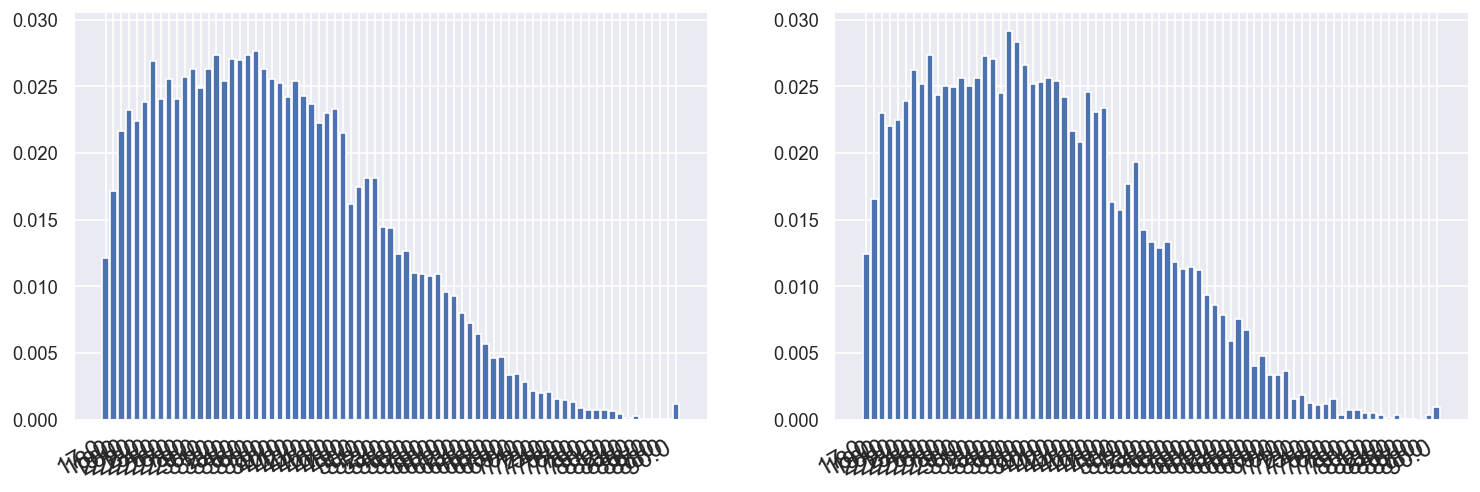

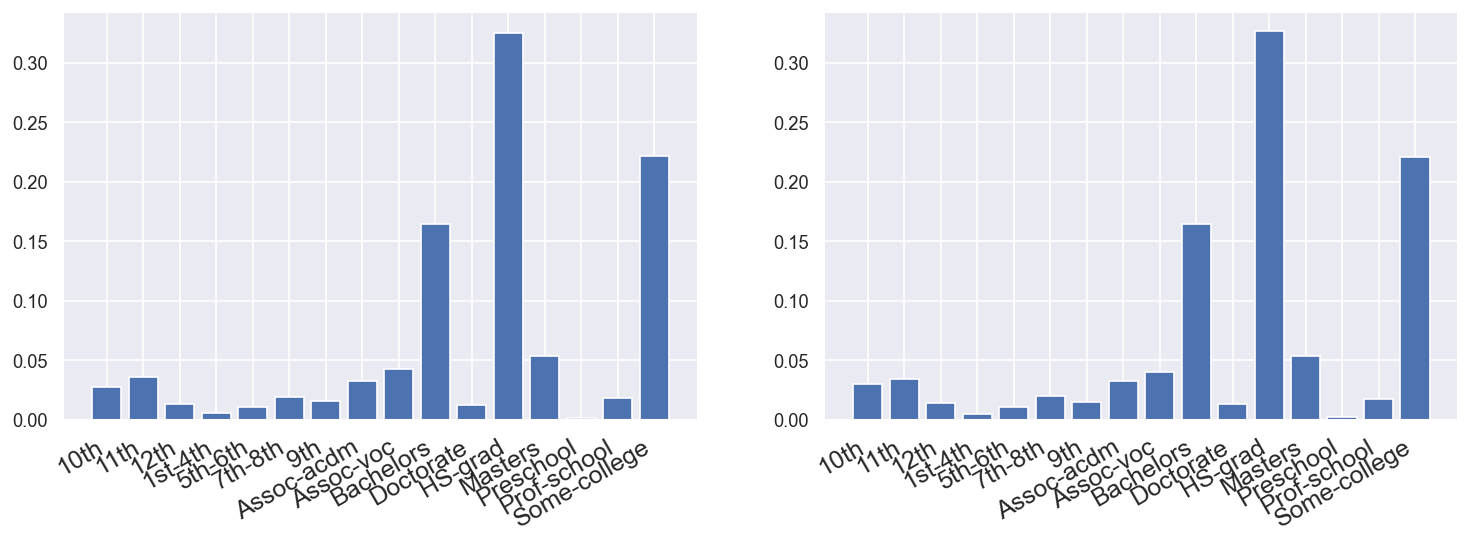

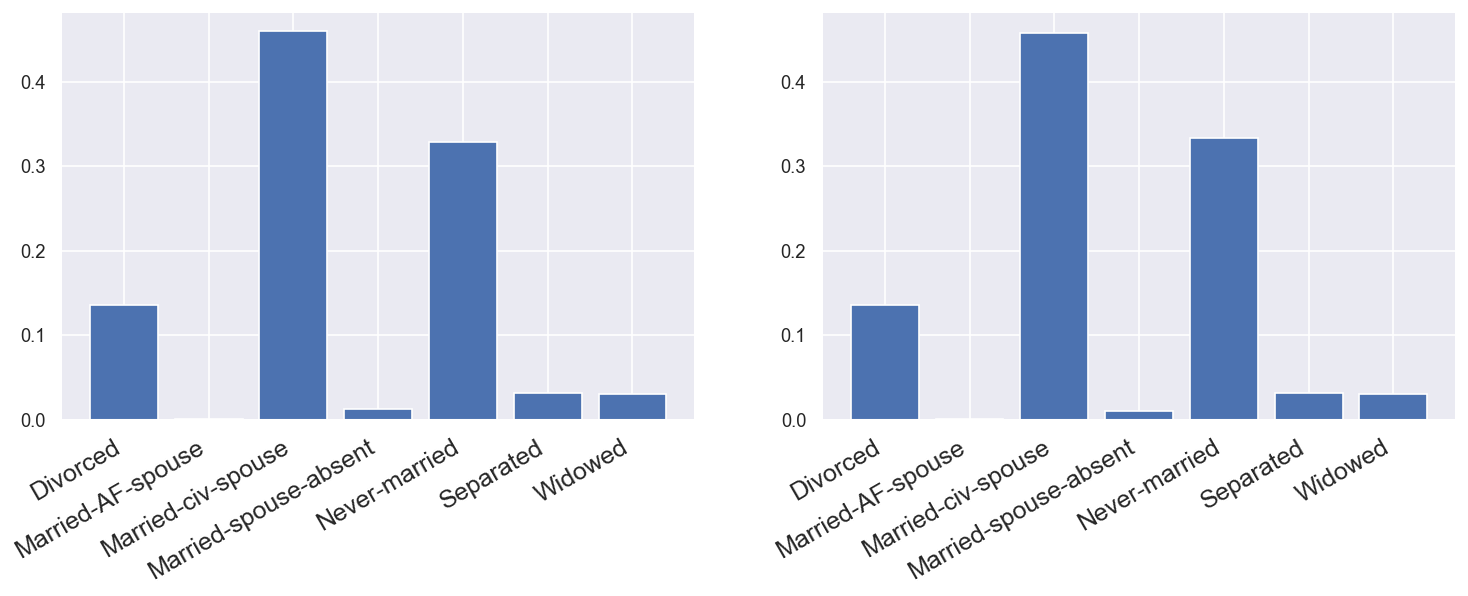

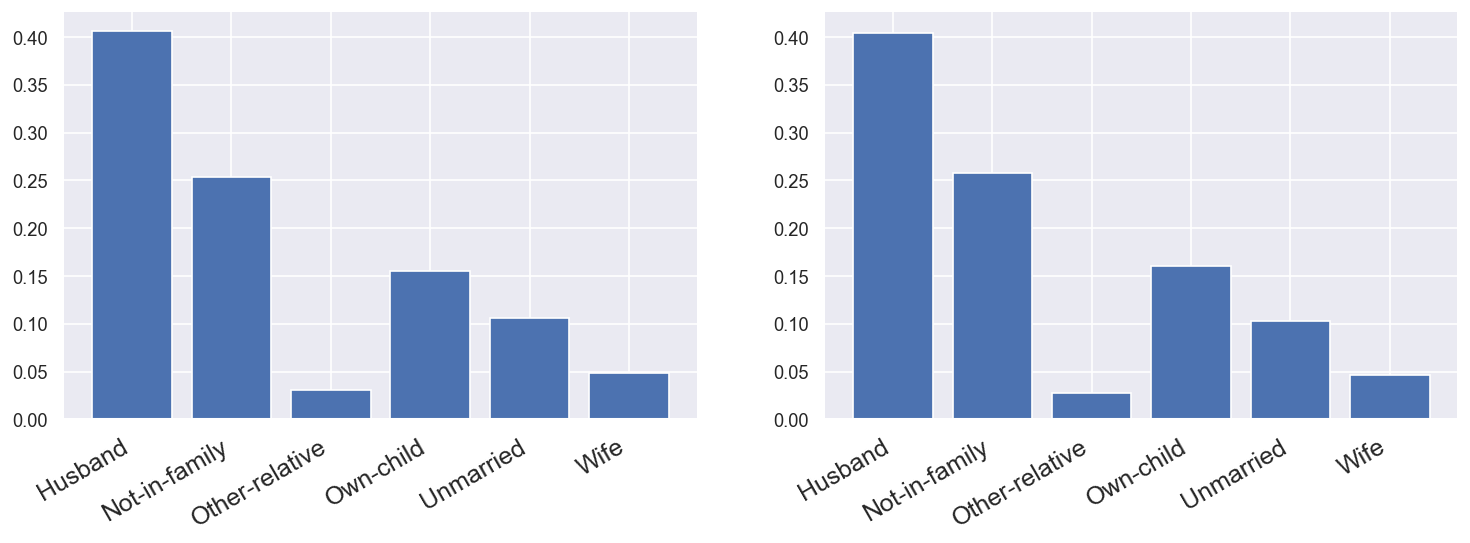

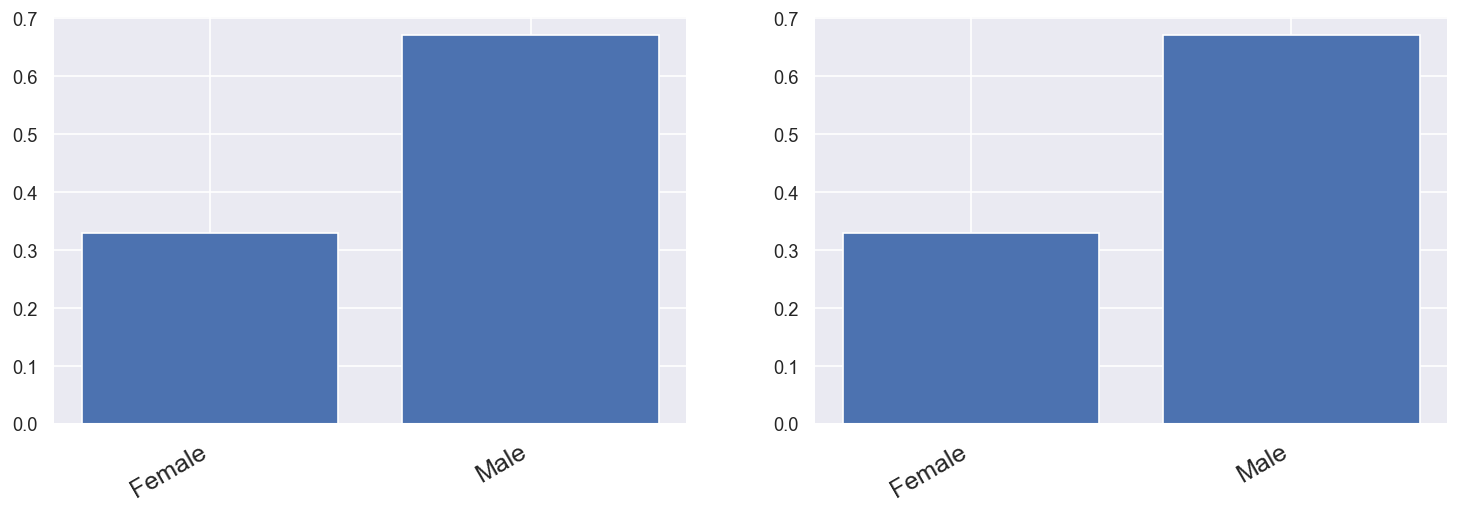

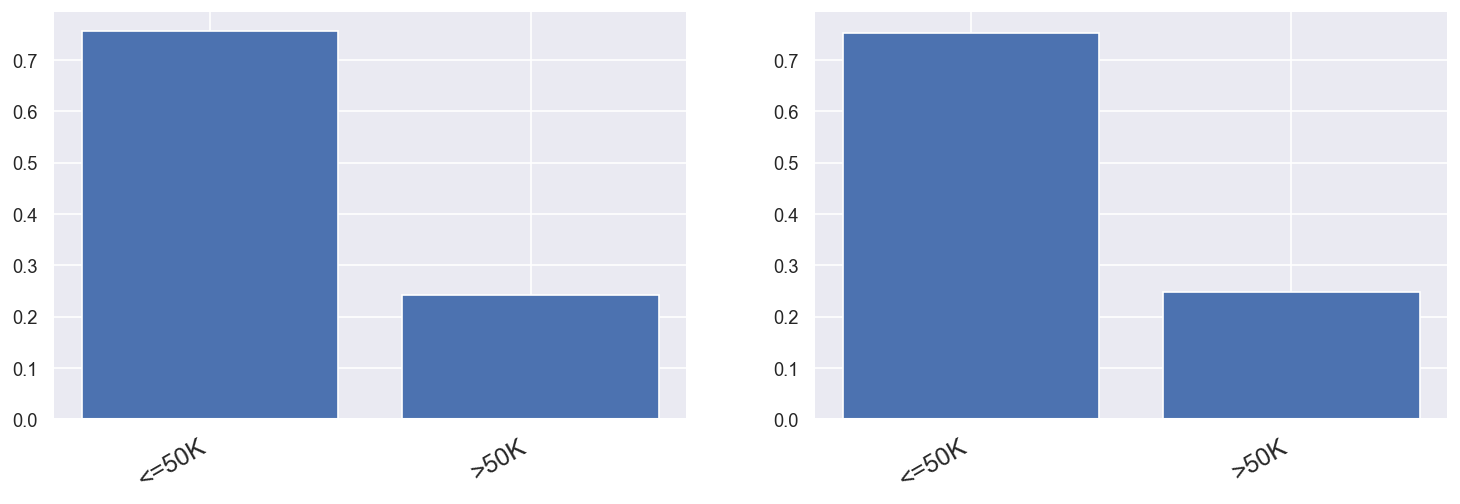

In [60]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

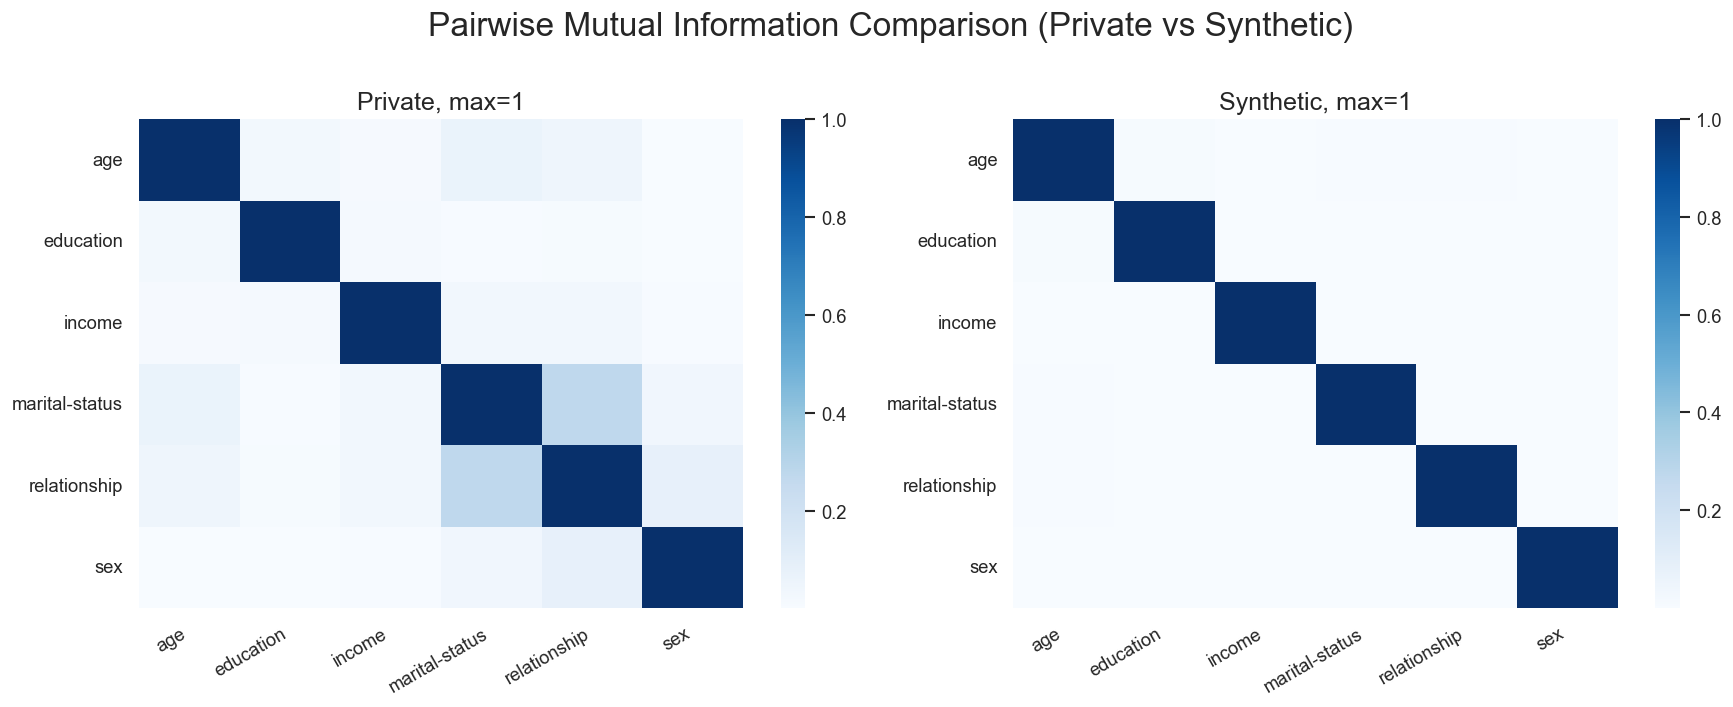

In [61]:
inspector.mutual_information_heatmap()